# Title: Titanic Dataset Analysis for Survival Prediction
## Author: Tarique Khan
## Date: 26/11/2019
## Output: my_submission2.csv

## Problem Statement: What sort of passengers survived in the disaster???

In [1]:
# Importing Libraries and packages
import pandas as pd 
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
# get graphs in the same workbook just after the cell
%matplotlib inline     
# setting seaborn default for plots
sns.set()              

In [2]:
train = pd.read_csv('F://DataScience/datasets/Titanic/train.csv')
test = pd.read_csv('F://DataScience/datasets/Titanic/test.csv')

# Exploratory data analysis

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Dictionary
- Survived: 0 = No, 1 = Yes
- Pclass: Ticket class 1 = Ist, 2 = 2nd, 3 = 3rd
- Sibsp: No of Siblings/spouse on board
- Parch: Parents/ Children on board
- embarked: Embarkation point C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# To check the number of rows and columns
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

# In test.csv, one column of Survived in not given

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


# Out of 891 only 714 "Age" values are present
# Out of 891 only 204 "Cabin" values are present
# Out of 891 only 889 "Embarked" values are present

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


# Out of 418 only 332 "Age" values are present
# Out of 418 only 417 "Fare" values are present
# Out of 418 only 91 "Cabin" values are present

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Out of 891 only 177 "Age" values are null
# Out of 891 only 687 "Cabin" values are null
# Out of 891 only 2 "Embarked" values are null

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Out of 418 only 86 "Age" values are null
# Out of 418 only 1 "Fare" values are null
# Out of 418 only 327 "Cabin" values are null

# Data Visualization

# Creating Bar Chart for Categorical Features
- 'Pclass'
- 'Sex'
- 'SbSp'
- 'Parch'
- 'Embarked'
- 'Cabin'
  

In [13]:
def bar_chart(feature):
    survived = train[train['Survived'] ==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(5,2.5))

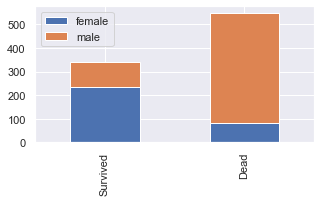

In [14]:
bar_chart('Sex')

# Chart shows that number of Females are more likely to be survived more than Males

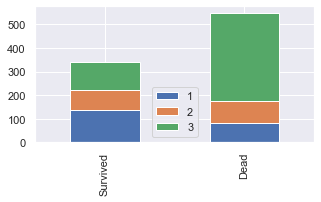

In [15]:
bar_chart('Pclass')

# Chart shows that More passengers are likely to be survived are from First Class while more passengers are likely to be died are from the Third class

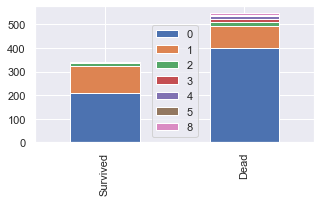

In [16]:
bar_chart('SibSp')

# Chart shows that More passengers likely to be survived having siblings or spouse while passengers without siblings or spouse are more likely to be died

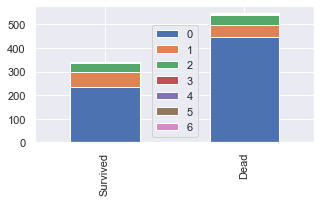

In [17]:
bar_chart('Parch')

# Chart shows that More passengers likely to be survived having parents or children while passengers without parents or children are more likely to be died

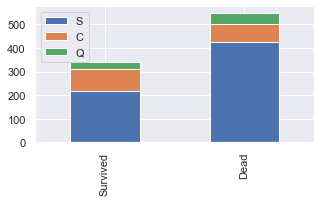

In [18]:
bar_chart('Embarked')

# Chart shows that More passengers likely to be survived having "C" as embarkation point than "Q" or "S" while passengers having "S" are more likely to be died

# Feature Engineering: creating n-dimensional feature vectors
## Combining train data and test dataset to create a features:
- "Title" like Mr., Mrs.....

In [19]:
train_test_data = [train, test]

for dataset in train_test_data:
#     d = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [20]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Countess      1
Jonkheer      1
Don           1
Capt          1
Ms            1
Sir           1
Mme           1
Name: Title, dtype: int64

In [21]:
# test['Title'].value_counts()

# Grouping different types of Titles into 5 categories and indexing them into numeric:
- "Mr":0,
- "Miss":1,
- "Mrs":2,
- "Master":3,
- "Others":4

In [22]:
Title_mapping = {"Mr":  0, "Miss": 1, "Mrs":2, "Master": 3, "Dr": 0, "Rev": 0, "Mlle": 4, "Col": 0, "Major": 0, "Mile": 3, "Countess": 3, "Ms": 1, "Lady": 2, "Jonkheer": 4, "Don": 4, "Dona": 4, "Mme": 4, "Capt": 0, "Sir": 0}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(Title_mapping)

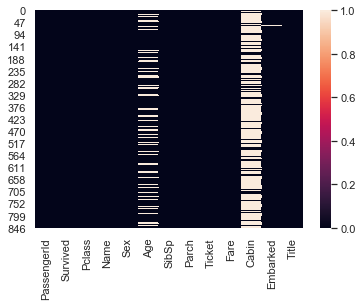

In [23]:
# Generating heatmap thru seaborn to verify all Title value are filled
sns.heatmap(train.isnull())

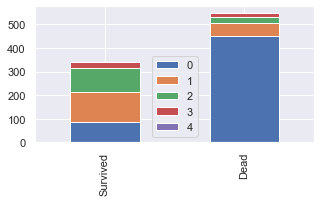

In [24]:
bar_chart('Title')
# Bar chart shows that Single Female or Married Females are more likely to be survived while males are more likely to be dead

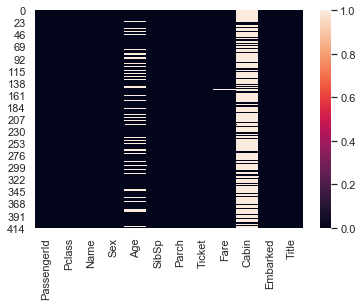

In [25]:
sns.heatmap(test.isnull())

In [26]:
# delete 'Name' feature from dataset as it is unnecessary
train.drop('Name', axis=1, inplace= True)
test.drop('Name', axis=1, inplace= True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


# Mapping Sex feature as "Male": 0, "Female": 1 

In [29]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

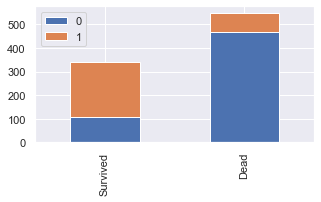

In [30]:
bar_chart('Sex')

# Handling missing values in "Age" by "Title" mean value of that category 

In [31]:
# filling missing age with mean age for each Title
train["Age"].fillna(train.groupby("Title")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("mean"), inplace=True)

In [32]:
# To verify Age filling in dataset
# sns.heatmap(train.isnull())
# sns.heatmap(test.isnull())

In [33]:
train.head(30)
train.groupby("Title")["Age"].transform("mean")

0      32.993990
1      36.009174
2      21.816327
3      36.009174
4      32.993990
         ...    
886    32.993990
887    21.816327
888    21.816327
889    32.993990
890    32.993990
Name: Age, Length: 891, dtype: float64

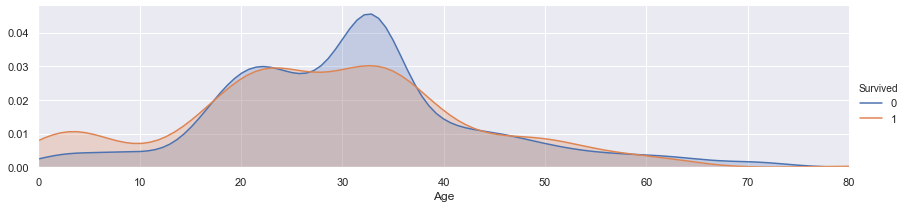

In [34]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()


plt.show()

(0, 20)

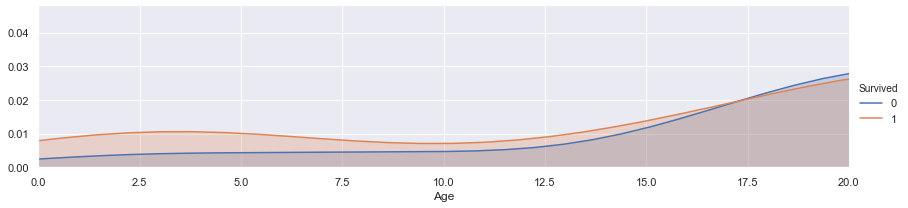

In [35]:
"""Chart shows that passengers from 0 to 15 years of Age are more likely to be survived 
while from 15 to 20 its almost 50-50 condition"""

facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()


plt.xlim(0, 20)

(20, 40)

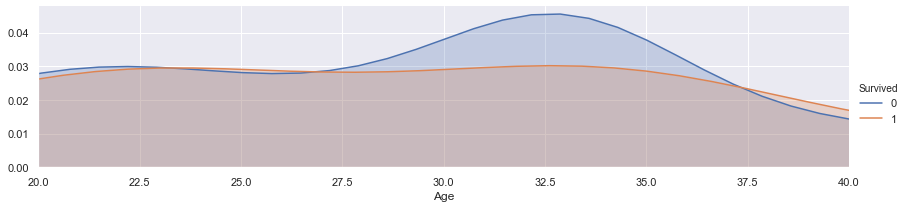

In [36]:
# Chart shows that passengers between 27.5 to 36.5 yeas of age are more likely to be died.
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()


plt.xlim(20, 40)

(40, 80)

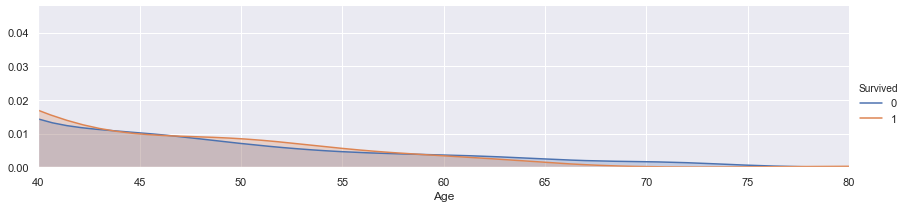

In [37]:
"""Chart shows that passengers between the age from 42.5 to 65 years are almost having similar 
condition while passsengers from the age between 75 to 80 years are more likely to be survived"""

facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(5, train['Age'].max()))
facet.add_legend()


plt.xlim(40, 80)

(75, 80)

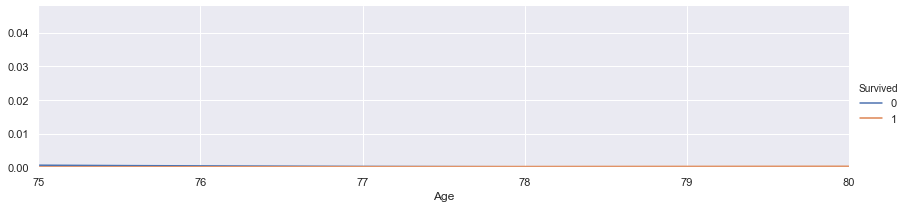

In [38]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()


plt.xlim(75, 80)

In [39]:
# train.info()

In [40]:
# test.info()

# Converting Age Float values(Numerical) into Categorical Variables
## Feature Vector Map:-
- infant:0 (0-5)years
- child: 1 (5-15)years
- young: 2 (15-35)years
- adult: 3 (35-55)years
- old:   4 (50-80)years"""

In [41]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 5, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 5) & (dataset['Age'] <= 15), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 35), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 55), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 55) & (dataset['Age'] <= 80), 'Age'] = 4

In [42]:
# train.head()

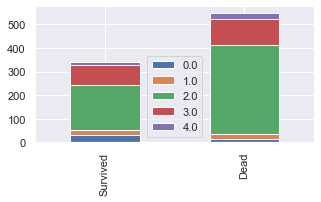

In [43]:
bar_chart('Age')

# Handling "Embarkation Points" by counting different "Pclass" then filling the missing values
**Mapping character values of 'Embarked' by categorical values**

In [44]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])

In [45]:
df

,S,C,Q
Embarked,127,85,2
Embarked,164,17,3
Embarked,353,66,72


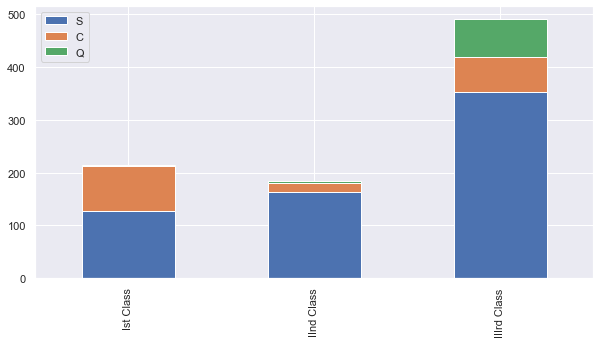

In [46]:
# Graph shows that in every class majority of passengers have "S" as embarkation point
df.index = ['Ist Class', 'IInd Class', 'IIIrd Class']
df.plot(kind= 'bar', stacked= True, figsize= (10,5))

In [47]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


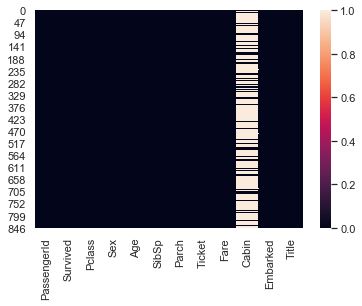

In [49]:
sns.heatmap(train.isnull())

In [50]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 76.6+ KB


In [52]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,2.160494,0.523008,0.381594,32.204208,0.361392,0.648709
std,257.353842,0.486592,0.836071,0.477990,0.786151,1.102743,0.806057,49.693429,0.635673,0.924720
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,512.329200,2.000000,4.000000


# Categorizing the "Fare" feature value and mapping

In [53]:
# fill missing 'Fare' with median fare of each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("mean"), inplace=True)

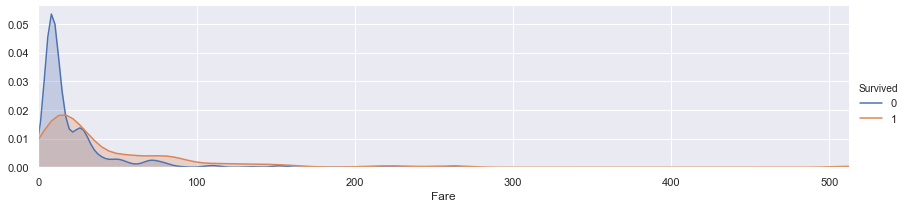

In [54]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()


plt.show()

(0, 100)

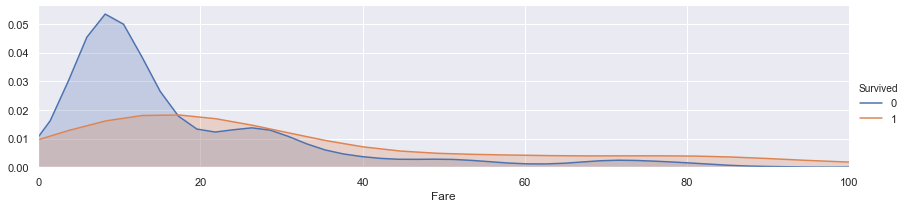

In [55]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()


plt.xlim(0, 100)

(100, 500)

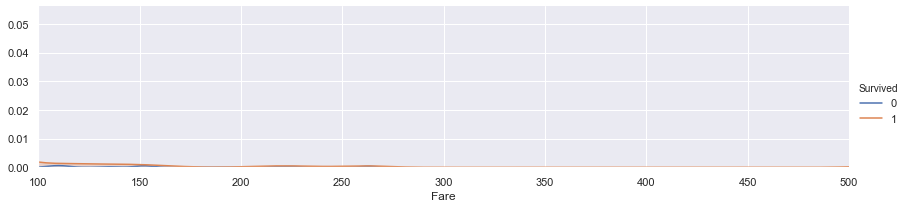

In [56]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()


plt.xlim(100, 500)

In [57]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 20, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 60), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 60) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3,

In [58]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,1.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


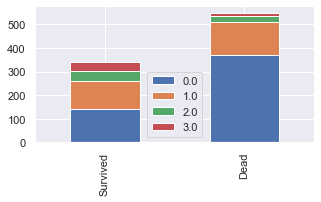

In [59]:
"""Chart Shows that Passengers having "Fare" more than 100 are most likely to survive and in between 60 to 100 are more likely
to survive while passengers having "Fare" less than 20 are more likely to be died"""

bar_chart('Fare')

# *Handling "Cabin" Feature by counting cabin values, filling missing values on the basis of "PClass" in the ship and converting them into categorical value*

In [60]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [61]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
              ..
A7             1
B82 B84        1
E10            1
D10 D12        1
C90            1
Name: Cabin, Length: 147, dtype: int64

In [62]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [63]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [64]:
Pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])

In [65]:
df

,C,B,D,E,A,T,F,G
Cabin,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
Cabin,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
Cabin,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


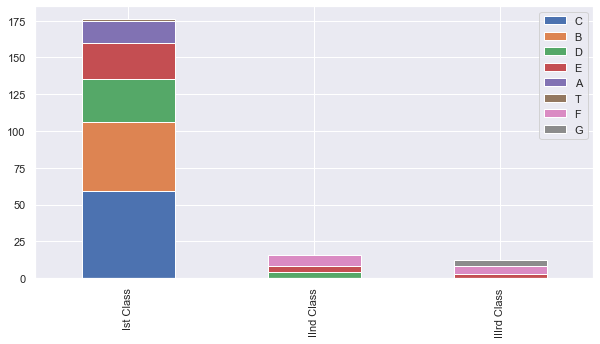

In [66]:
df.index = ['Ist Class', 'IInd Class', 'IIIrd Class']
df.plot(kind= 'bar', stacked= True, figsize= (10,5))

In [67]:
cabin_mapping = {"A": 0, "B": 0.4, "C":0.8, "D": 1.2, "E": 1.6, "F":2.0, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [68]:
# filling missing "Cabin" with median "Cabin" for each Pclass

train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [69]:
train.Cabin.value_counts()

2.0    492
1.8    168
0.8     99
0.4     47
1.2     33
1.6     32
0.0     15
2.4      4
2.8      1
Name: Cabin, dtype: int64

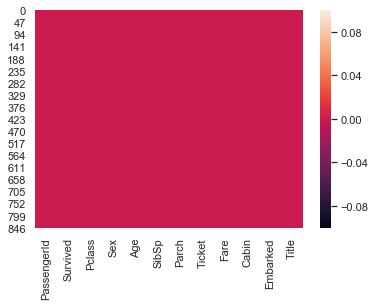

In [70]:
sns.heatmap(train.isnull())

# Handling "SibSp" & "Parch" features by clubbing them and making new feature:
- "FamilySize" = "SibSp" + "Parch" + 1(Passenger)

In [71]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

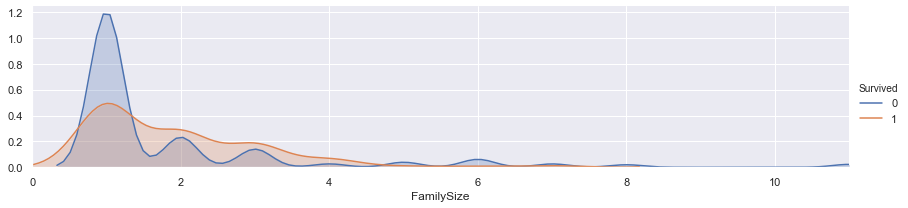

In [72]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim()

# Mapping "FamilySize" 

In [73]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2.0, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

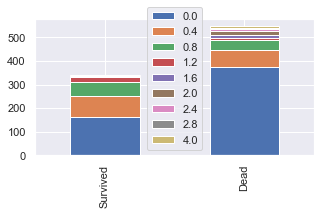

In [74]:
bar_chart('FamilySize')

# Dropping features "PassengerId" as is doesn't shows any relevance with the survival/dead from train data only
# Dropping features "Ticket" as is doesn't shows any relevance with the survival/dead from train and test data
# Dropping features "SibSp" and "Parch" as we had already included their counts in "FamilySize" from train and test data
# Dropping features "Survived" from train data only

In [75]:
features_drop = ['Ticket', 'SibSp', "Parch"]
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop, axis = 1)
train = train.drop(['PassengerId'], axis=1)

In [76]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [77]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,2.0,0.0,2.0,0,1,0.0
3,1,1,2.0,1.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,1.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,1.0,1.0,1.8,1,2,0.4


# Data Modelling

In [78]:
# Importing Classifiers Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Cross Validation(K-fold): splitting the data into multiple folds

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle=True, random_state=0)

# KNN

In [80]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.82022472 0.82022472 0.82022472 0.87640449 0.85393258
 0.78651685 0.79775281 0.79775281 0.80898876]


In [81]:
# Mean kNN Score
round(np.mean(score)*100, 2)

82.04

# Decision Tree

In [82]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.83146067 0.78651685 0.7752809  0.86516854 0.79775281
 0.80898876 0.76404494 0.73033708 0.79775281]


In [83]:
# Mean Decision Tree Score
round(np.mean(score)*100,2)

79.68

In [84]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,2.0,0.0,2.0,0,1,0.0
3,1,1,2.0,1.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [85]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [86]:
# import pydotplus
# from sklearn.externals.six import StringIO
# from sklearn.tree import export_graphviz
# dot_data = StringIO()
# export_graphviz(clf, out_file = dot_data, feature_names = train_data, filled = True, rounded=True, impurity=False)
# graph = pydotplus.grapg_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

In [87]:
# from sklearn.externals.six import StringIO
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# # import pydotplus
# dot_data = StringIO()
# features = list[(train_data, columns[:2])]
# X_train = train_data['features']
# y_train = train['Survived']
# export_graphviz(clf, out_file = dot_data, feature_names = features, filled = True, rounded=True, impurity=False)
# # graph = pydotplus.grapg_from_dot_data(dot_data.getvalue())
# graph.write_png('F:/DataScience/datasets/Titanic/tree.png')

# Random Forest Classifier

In [88]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.82022472 0.79775281 0.7752809  0.84269663 0.83146067
 0.80898876 0.75280899 0.7752809  0.80898876]


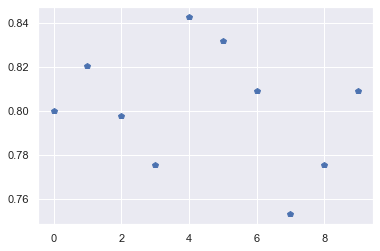

In [89]:
plt.plot(score,"p")

In [90]:
# Mean Random Forest Score
round(np.mean(score)*100, 2)

80.13

# Naive Bayes Classifier

In [91]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.76404494 0.76404494 0.75280899 0.69662921 0.78651685
 0.73033708 0.80898876 0.80898876 0.85393258]


In [92]:
# Mean Naive Bayes Score
round(np.mean(score)*100, 2)

78.0

# SVM classifier

In [93]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.80898876 0.82022472 0.85393258 0.82022472
 0.83146067 0.86516854 0.83146067 0.83146067]


C:\Users\Tarique\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Tarique\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Tarique\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Tarique\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

In [94]:
# Mean SVM score
round(np.mean(score)*100, 2)

82.94

# Logistic Regression Classifier

In [95]:
#Splitting data set for cross validation
from sklearn.model_selection import train_test_split
X = train_data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [96]:
#Using Logistic Regression for prediction
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)
predictionLR = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictionLR))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       154
           1       0.84      0.69      0.76       114

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.81      0.81       268



In [97]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictionLR)

0.7977899293688768

# Testing Test Data by SVM classifier as it is showing the highest mean score

In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
FamilySize     418 non-null float64
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


In [99]:
# sns.heatmap(test.isnull())

In [100]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)
prediction

C:\Users\Tarique\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [101]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submission.to_csv('F:/DataScience/datasets/Titanic/my_submission2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [102]:
submission = pd.read_csv('F:/DataScience/datasets/Titanic/my_submission2.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [103]:
submission.Survived.value_counts()


0    259
1    159
Name: Survived, dtype: int64